----------------------------------------------------------------------------------------------------------------
For parameter A        :     $     85.55209 \pm      0.60276 $
For parameter f        :     $      0.00101 \pm      0.00000 $
For parameter phi      :     $     -0.48427 \pm      0.00558 $
For parameter c        :     $     20.53411 \pm      0.37438 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          91.76465910
Reduced χ² value       :     χ²_red           0.70588199
P-value                :     p-value          0.99549517
----------------------------------------------------------------------------------------------------------------

0.001010482122335826


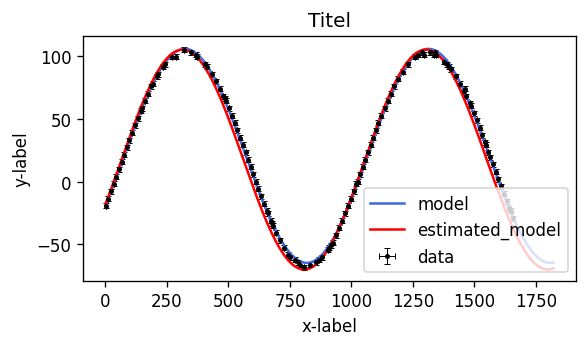

----------------------------------------------------------------------------------------------------------------
For parameter A        :     $    183.75530 \pm      0.65963 $
For parameter f        :     $      0.00240 \pm      0.00000 $
For parameter phi      :     $     -0.28591 \pm      0.00247 $
For parameter c        :     $    -15.85119 \pm      0.37438 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min        1494.33835203
Reduced χ² value       :     χ²_red          11.49491040
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------

0.00239958524232246


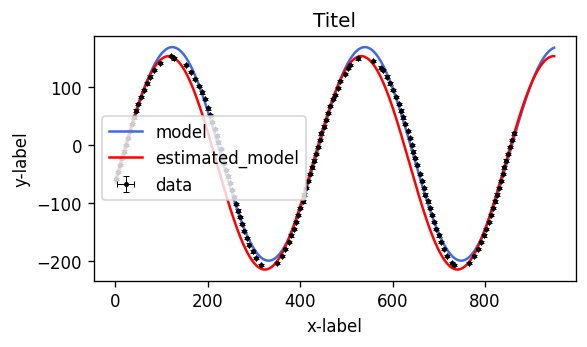

In [5]:
import fit_classes as fp
import numpy as np
import os
from scipy.interpolate import interp1d
from scipy import optimize

errors = []
ERROR = 2 # Error in mV

class DataPlus(fp.Data):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        def sinus_model(params, x):
            A,f,phi,c = params
            return A*np.sin(2*np.pi*f*x + phi) + c
        
        A, f, phi, c = 100, 0.006, -13.06097, 25
        A = (np.abs(max(self.y)) + np.abs(min(self.y)))/2
        c = (max(self.y) + min(self.y))/2

        f_interp = interp1d(self.x, self.y, kind='cubic')
        x_dense = np.linspace(self.x.min(), self.x.max(), 1000)
        y_dense = f_interp(x_dense)

        crossings = []
        for i in range(len(x_dense)-1):
            if (y_dense[i] - c) * (y_dense[i+1] - c) < 0:  # Sign change
                # Refine crossing with brentq
                root = optimize.brentq(lambda x_val: f_interp(x_val) - c, x_dense[i], x_dense[i+1])
                crossings.append(root)
                # punt
                # if self.x[list(self.x).index(punt) - 5] > self.x[list(self.x).index(punt) + 5]:
                #     dalende_root.append(punt)

        
        # Find descending zero-crossings
        stijgende_root = []
        for i in range(len(self.y) - 2):
            if (self.y[i - 1] + self.y[i - 2])/2 < c and (self.y[i + 1] + self.y[i + 2])/2 >= c and self.x[i] > 10:
                if stijgende_root != []:
                    if self.x[i] - stijgende_root[-1] > 10:
                        stijgende_root.append(self.x[i])
                else:
                    stijgende_root.append(self.x[i])
        
        crossing_count = len(crossings)
        # crossing_count = crossing_count if crossing_count < 30 else 30
        f = 0.00101048 if abs(len(crossings) - 21) < abs(len(crossings) - 42) else 0.00239959
        phi = -(stijgende_root[0]*f)*2*np.pi

        FIT_POINTS = 400

        self.x = self.x[:FIT_POINTS][::3]
        self.y = self.y[:FIT_POINTS][::3]
        self.dx = self.dx[:FIT_POINTS][::3]
        self.dy = self.dy[:FIT_POINTS][::3]

        self.fit = self.fit(sinus_model, initial_guess=(A, f, phi, c))
        self.fit.init = A, f, phi, c


        self.A, self.f, self.phi, self.c = self.fit.minima

def data_from_file(file):
    file_path = os.path.join(os.path.dirname(os.path.abspath(os.getcwd())), file)
    data = np.genfromtxt(file_path, delimiter=",", skip_header=9)
    x = data[:, 0].astype(int)
    y = data[:, 1]
    mask = np.concatenate(([True], y[1:] != y[:-1]))
    x = x[mask]
    y = y[mask]

    dy = ERROR*np.ones_like(y)
    return DataPlus(x, y, dy, name=file_path)
        
def get_lowest_folders(root):
    lowest_folders = []
    for dirpath, dirnames, filenames in os.walk(root):
        if not dirnames:
            lowest_folders.append(dirpath)
    return lowest_folders

def load_data_by_folder(root):
    folder_data = {}
    total_files = 0
    for folder in get_lowest_folders(root):
        total_files += len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

    current_file = 0
    for folder in get_lowest_folders(root):
        folder_name = os.path.basename(folder)
        data_list = []
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            if os.path.isfile(file_path):
                current_file += 1
                # os.system(f'echo "File: {current_file:>3}/{total_files}"')
                data_list.append(data_from_file(file_path))
        
        if data_list:
            folder_data[folder_name] = np.array(data_list)
    return folder_data

data_arrays = load_data_by_folder(os.path.join(os.path.abspath(os.getcwd()), "data"))

for error in errors:
    display(f'ERROR: "{error}"')

# print(data_arrays['opgave1'][0].show())
print(f"{data_arrays['opgave1'][0].fit}")
print(f"{data_arrays['opgave1'][0].f}")
# print(f"{data_arrays['opgave1'][0].A}")
# print(f"{data_arrays['opgave1'][0].w}")
data_arrays['opgave1'][0].fit.show(size=2, fit_guess=True)
print(f"{data_arrays['opgave5_freq2'][13].fit}")
print(f"{data_arrays['opgave5_freq2'][13].f}")
data_arrays['opgave5_freq2'][13].fit.show(size=2, fit_guess=True)


opgave2_1 15
chi2_red: 396.7586705232311


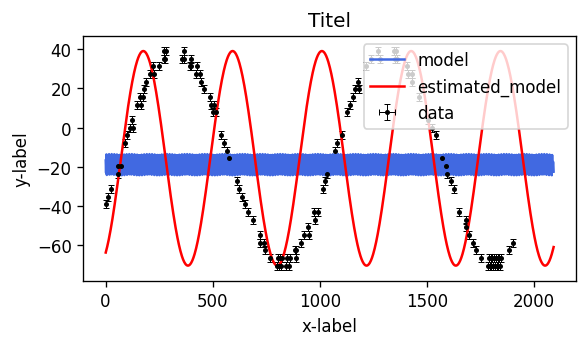

opgave2_1 16
chi2_red: 203.6548993362769


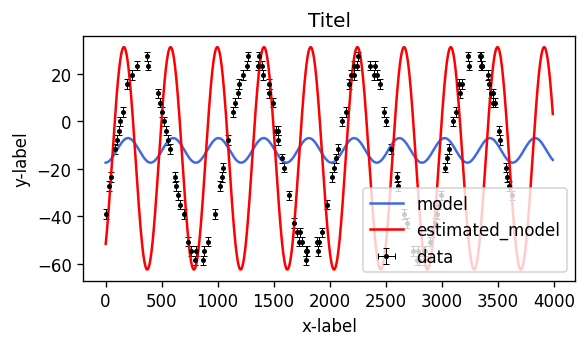

opgave2_1 17
chi2_red: 88.98888349405867


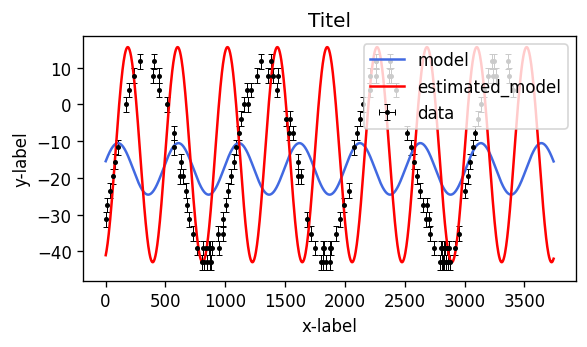

opgave2_1 21
chi2_red: 116.82606415507831


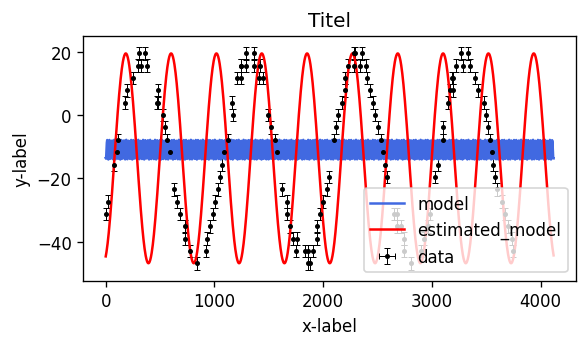

opgave2_1 22
chi2_red: 219.80136869827496


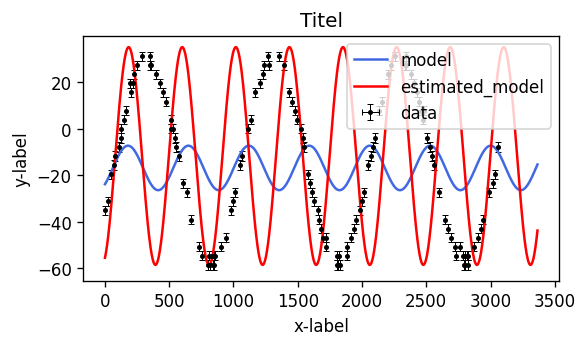

opgave2_2 9
chi2_red: 226.0345370474968


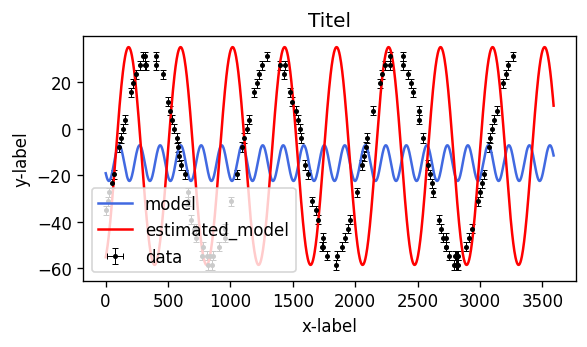

opgave2_2 11
chi2_red: 60.003801492641315


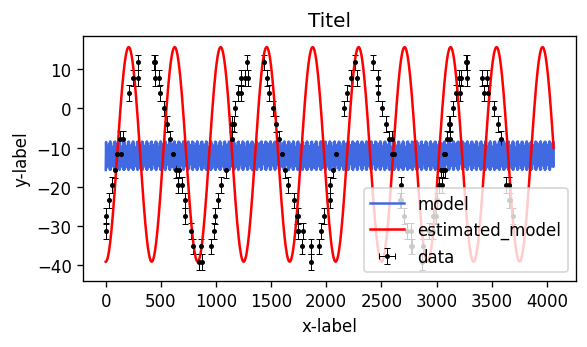

opgave2_2 26
chi2_red: 188.2400836338962


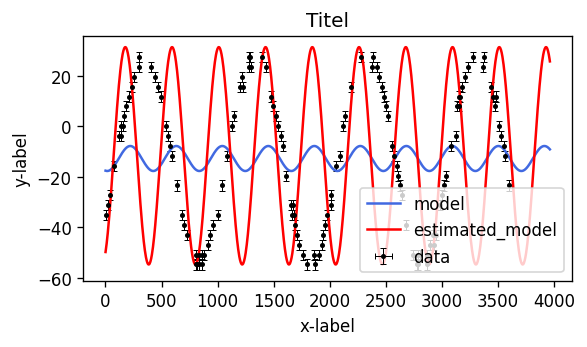

opgave2_2 28
chi2_red: 54.72695086981449


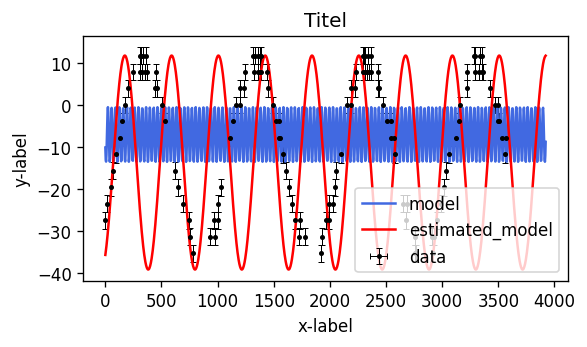

opgave2_2 29
chi2_red: 337.78711628483006


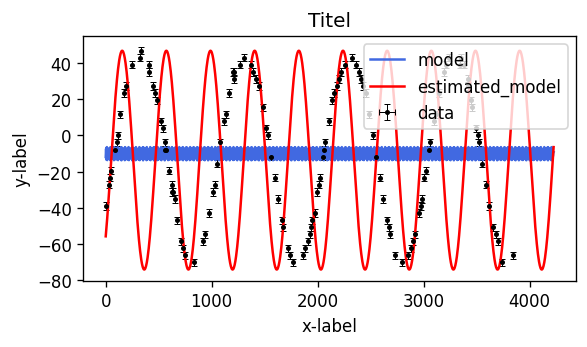

opgave2_3 6
chi2_red: 191.4585079600851


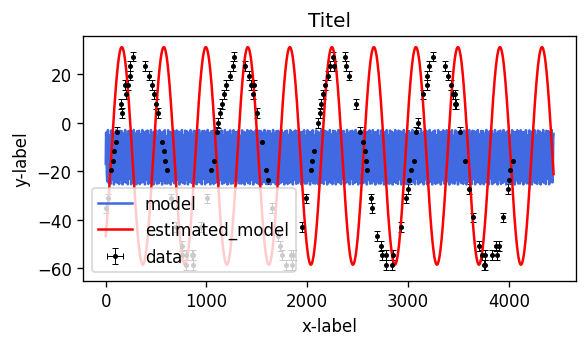

opgave2_3 19
chi2_red: 230.89410660347997


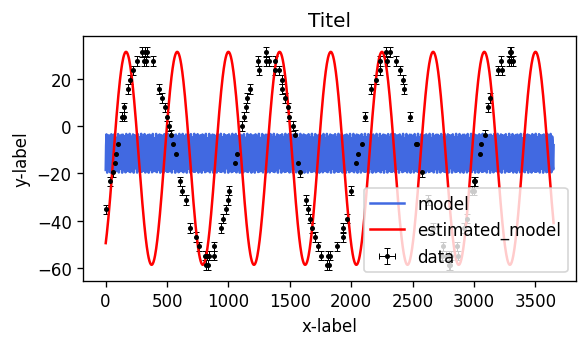

opgave2_3 29
chi2_red: 69.53943901581233


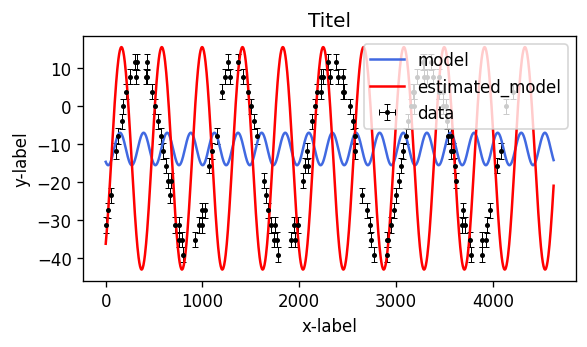

opgave2_3 30
chi2_red: 68.77363155784437


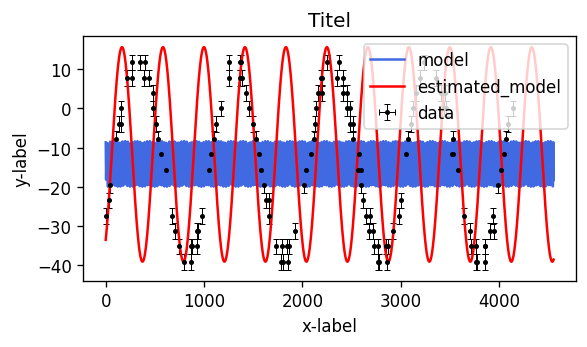

opgave4_freq1 5
chi2_red: 542.291419015743


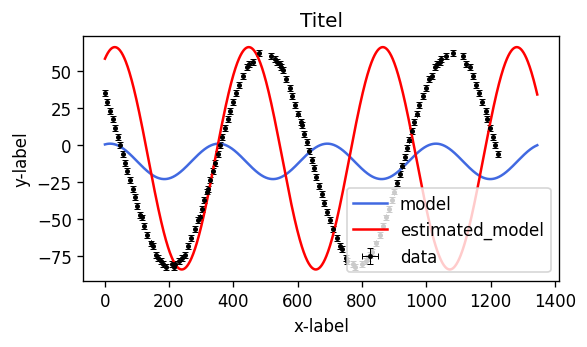

opgave4_freq1 6
chi2_red: 398.7870521913971


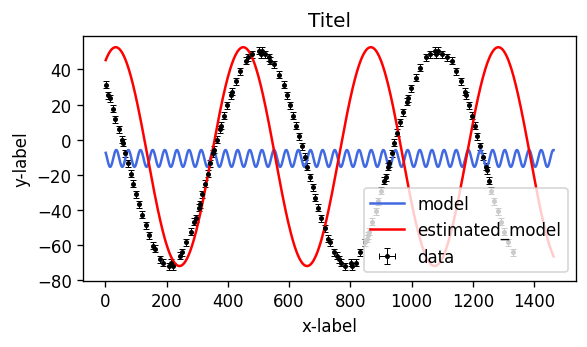

opgave4_freq1 7
chi2_red: 256.8066620170192


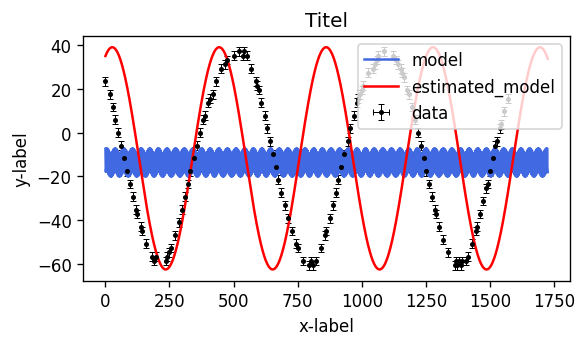

opgave4_freq1 8
chi2_red: 132.3264665805681


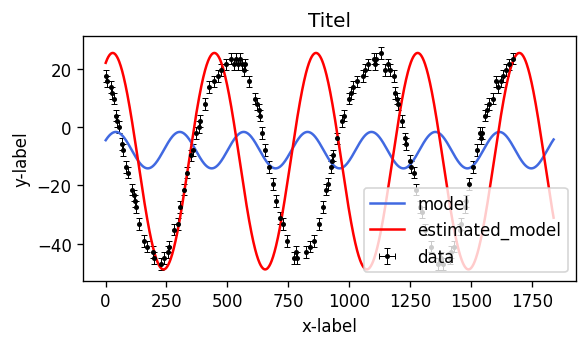

opgave4_freq1 12
chi2_red: 90.59190958021175


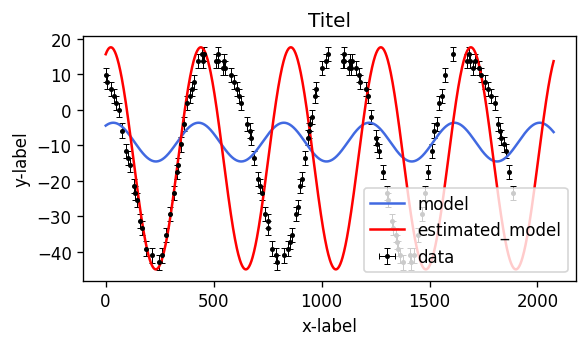

opgave4_freq1 13
chi2_red: 213.44323922186086


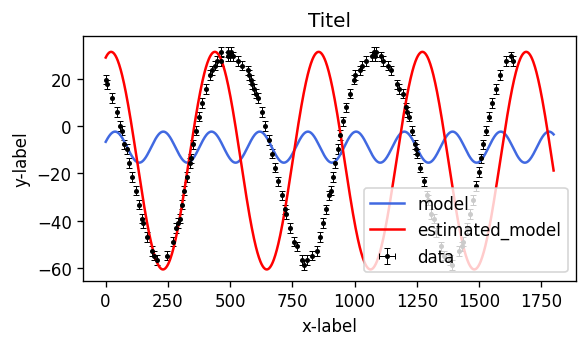

opgave4_freq1 14
chi2_red: 353.49025052819854


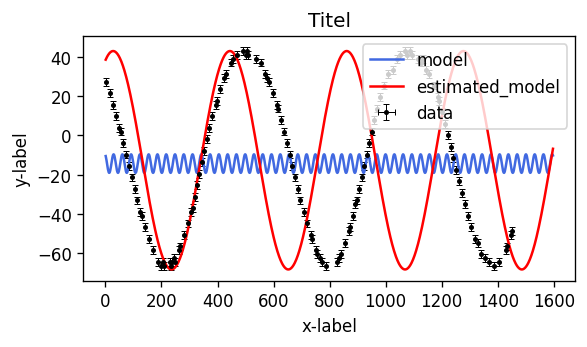

opgave4_freq1 15
chi2_red: 440.8639363906269


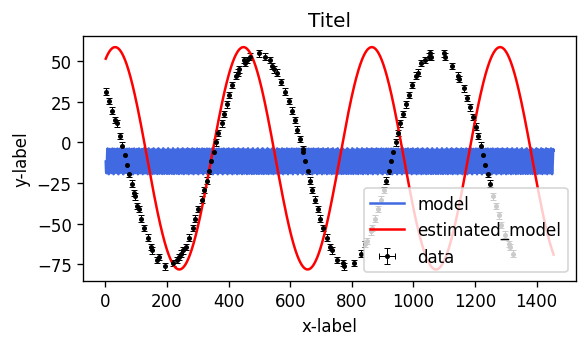

opgave4_freq1 18
chi2_red: 741.8321654054264


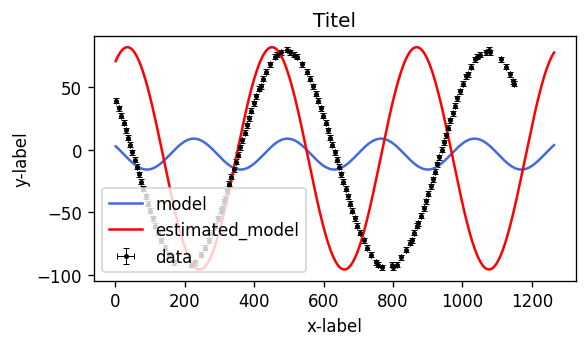

opgave4_freq2 3
chi2_red: 382.18068543644455


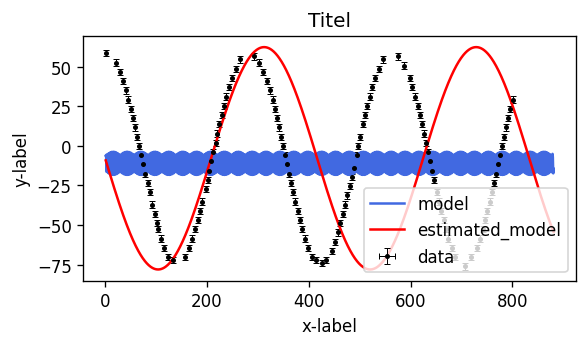

opgave4_freq2 4
chi2_red: 191.59092716572778


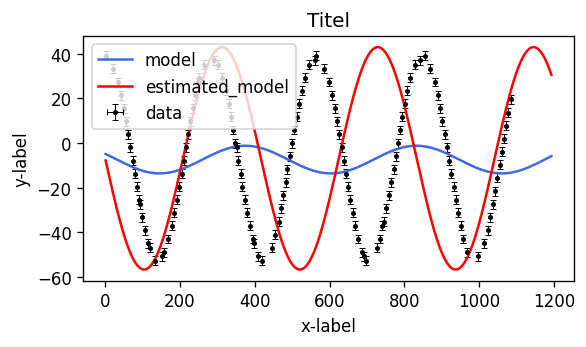

opgave4_freq2 5
chi2_red: 66.1547747376207


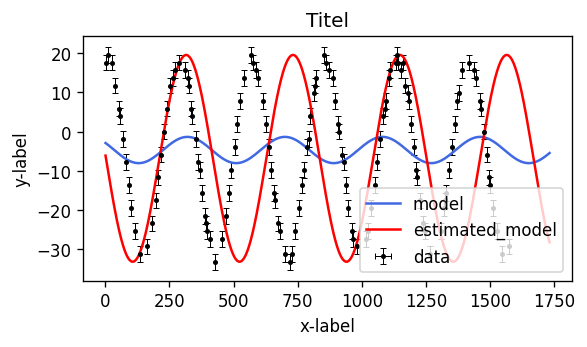

opgave4_freq2 7
chi2_red: 249.08879218108694


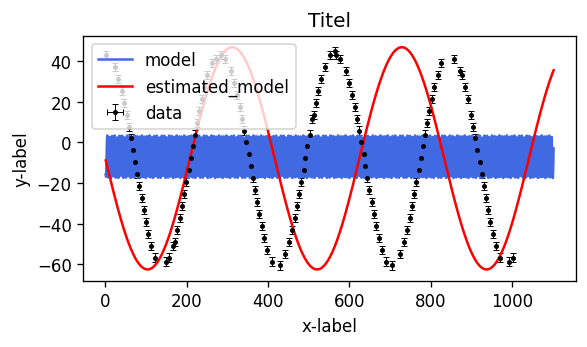

opgave4_freq2 8
chi2_red: 506.54530653265874


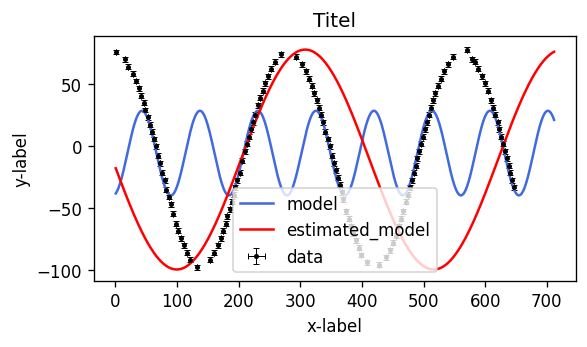

opgave4_freq2 13
chi2_red: 362.4853174469975


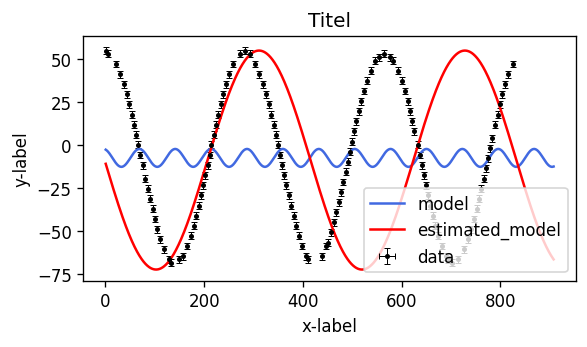

opgave4_freq2 17
chi2_red: 403.66986300812613


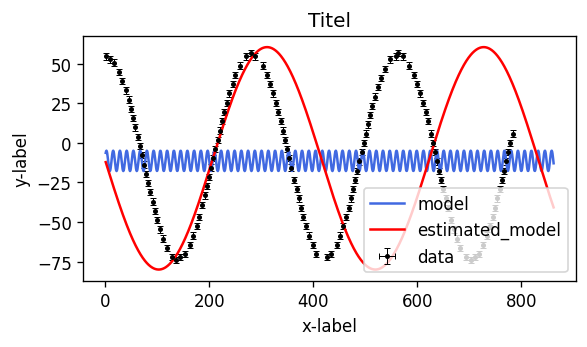

opgave5_freq1 8
chi2_red: 59.647476158795


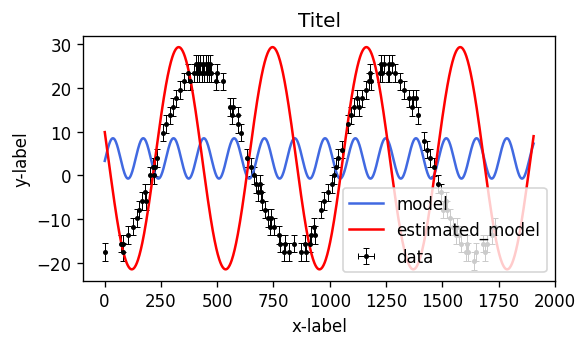

opgave5_freq1 12
chi2_red: 54.32559094269322


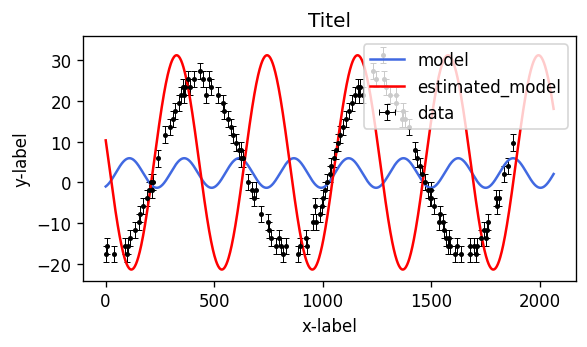

opgave5_freq3 2
chi2_red: 286.79840244498405


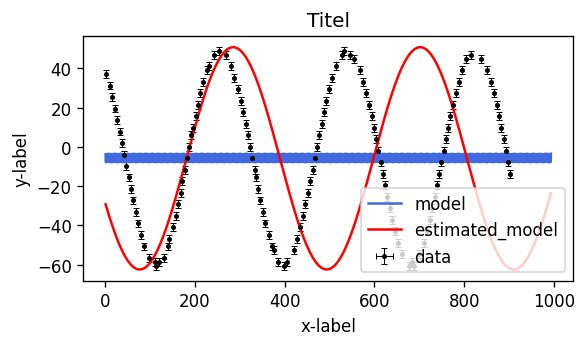

opgave5_freq3 3
chi2_red: 92.46050267513041


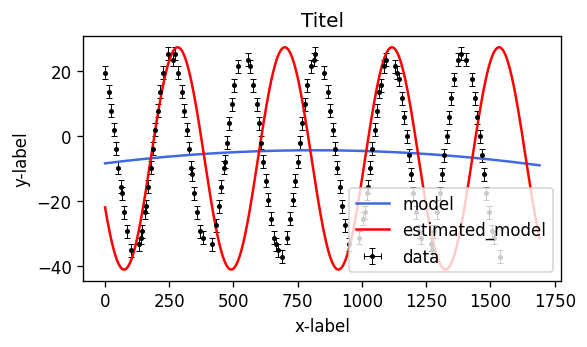

opgave5_freq3 8
chi2_red: 413.5525624773999


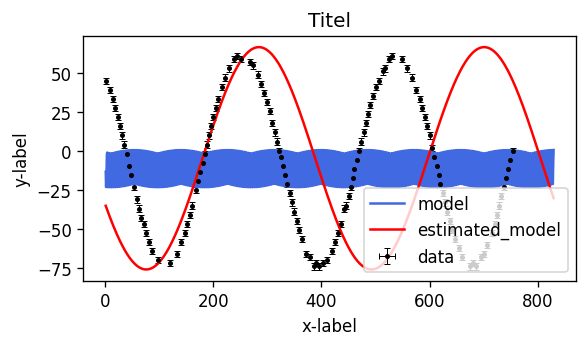

opgave5_freq3 9
chi2_red: 167.87703655249405


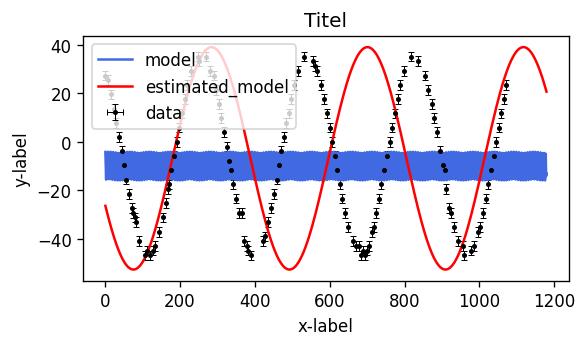

opgave5_freq3 12
chi2_red: 435.8918397138603


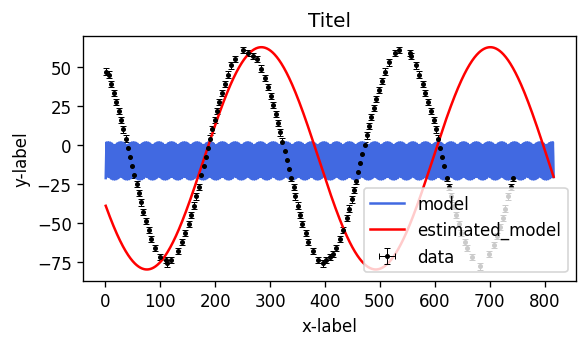

opgave5_freq3 15
chi2_red: 318.3295715267393


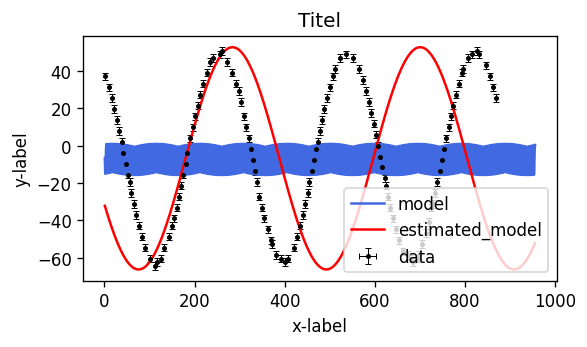

opgave5_freq3 18
chi2_red: 221.56895057424308


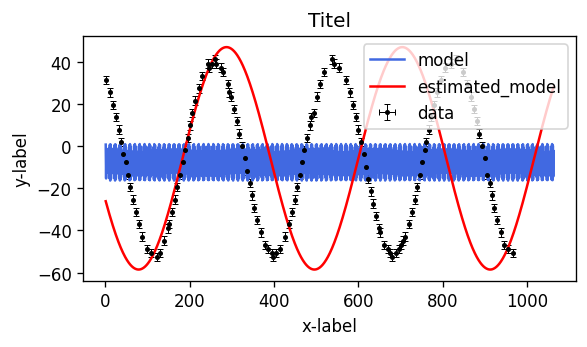

39

In [6]:
# CAREFULL: THIS DISPLAYS 213 FITS!!!
count = 0
for key in data_arrays:
    for i in range(len(data_arrays[key])):
        if data_arrays[key][i].fit.chi2_red > 50:
            print(key, i)
            print("chi2_red:", data_arrays[key][i].fit.chi2_red)
            data_arrays[key][i].fit.show(size=2, fit_guess=True)
            count += 1
display(count)

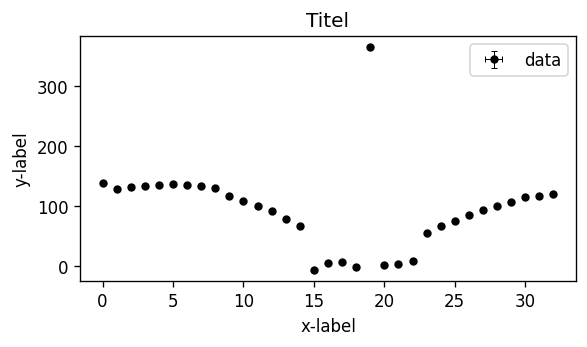

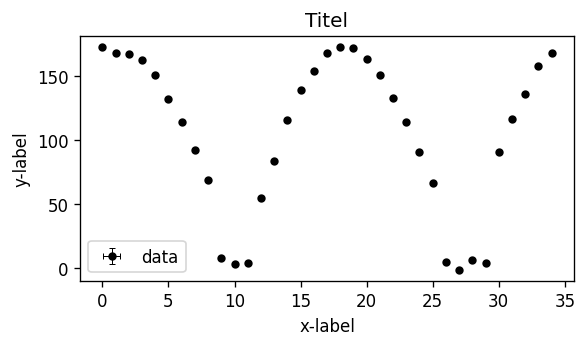

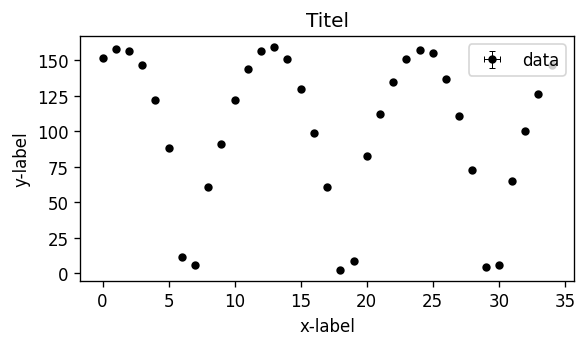

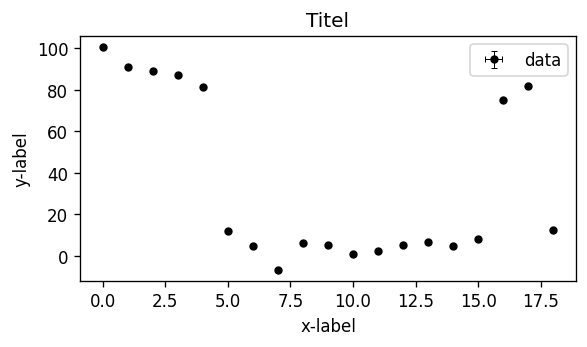

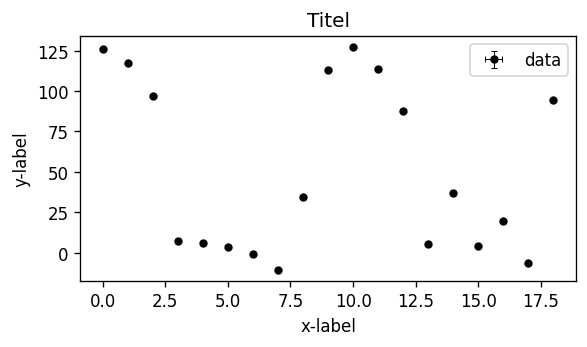

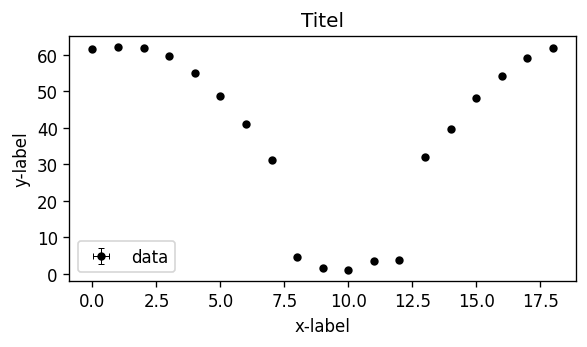

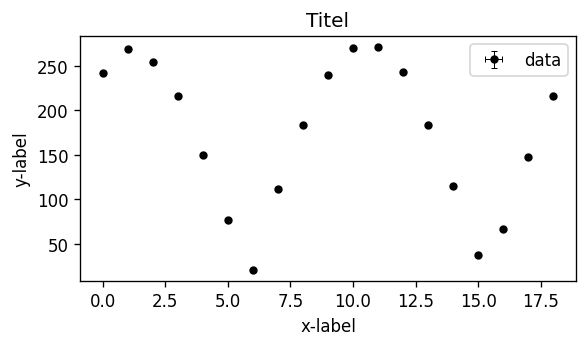

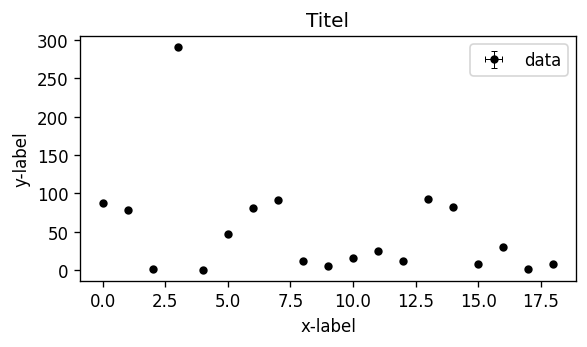

In [7]:
def sinus_model(params, x):
    A,f,phi,c = params
    return A*np.sin(2*np.pi*f*x + phi) + c

for file in ['opgave2_1', 'opgave2_2', 'opgave2_3', 'opgave4_freq1', 'opgave4_freq2', 'opgave5_freq1', 'opgave5_freq2', 'opgave5_freq3']:
    x = [i for i in range(len(data_arrays[file]))]
    y = [data_arrays[file][i].A for i in range(len(data_arrays[file]))]
    dy = np.zeros_like(y)
    opgave2_1_A = fp.Data(x, y, dy)
    opgave2_1_A.show()